## Notebook 6B - Mon/Tues
### Vector plots in 2D and 3D to visualize electric and magentic fields
### Total points: 7
#### PHYS 225 Intro to Computational Physics, Fall 2020

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

# Review: Making plots with meshgrid
Making plots of a function like 
$$ z = \sin(x)\sin(y) $$
requires evaluating the function over a 2D set of points.

* `np.linspace()` is great for 1D arrays of points for plotting $y = f(x)$
* `np.meshgrid()` can make 2D and 3D arrays of points for plotting $z = g(x,y)$, or $w = h(x,y,z)$.

Imagine a grid of points in the $x-y$ plane that you want to plot a function at..
$$\begin{matrix} 
(x_1, y_1) & (x_2,y_1) & (x_3,y_1) \\ 
(x_1, y_2) & (x_2,y_2) & (x_3,y_2) \\ 
(x_1, y_3) & (x_2,y_3) & (x_3,y_3) 
\end{matrix}$$

Meshgrid allows you to create two matrices, one with all the x-coordinates and one with all the y-coordinates.
$$ X = \left(\begin{matrix} 
x_1 & x_2 & x_3 \\ 
x_1 & x_2 & x_3 \\ 
x_1 & x_2 & x_3 
\end{matrix}\right),
Y = \left(\begin{matrix} 
y_1 & y_1 & y_1 \\ 
y_2 & y_2 & y_2 \\ 
y_3 & y_3 & y_3 
\end{matrix}\right)$$

In [4]:
xrange = np.linspace(-3,3,7)  # 1D array of x values
yrange = np.linspace(0,6,7)  # 1D array of y values
X, Y = np.meshgrid(xrange, yrange) 
print("X = \n", X)
print("Y = \n", Y)

X = 
 [[-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]]
Y = 
 [[0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5. 5. 5.]
 [6. 6. 6. 6. 6. 6. 6.]]


# Example: Plotting a vector field function
The magnetic field around a long straight wire curls around the wire and decreases in magnitude like $1/r$. Ignoring the physical constants, the field has a mathematical form similar to
$V_x = -y/r^2, V_y = x/r^2$.

The steps for creating the a quiver plot or streamplot are
1. Define array representing x-range (limits and step size)
1. Define array representing y-range (limits and step size)
1. Use `np.meshgrid()` to define the `X` and `Y` 2D arrays
1. Calculate `Vx = f(X,Y)` and `Vy = g(X,Y)` where `f` and `g` are functions of your choosing.
1. `plt.quiver(X, Y, Vx, Vy)` where `X` and `Y` define the grid points and `Vx` and `Vy` determine the length and direction of the vector.

Text(0, 0.5, 'y')

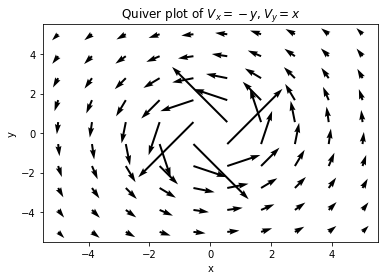

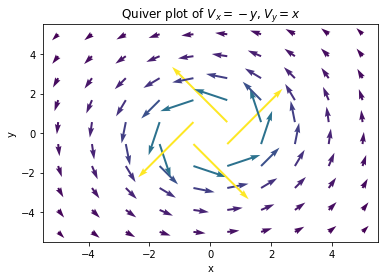

In [6]:
""" Plot the magnetic field curling around a wire """


xrange = np.linspace(-5,5,10)  # 1D array of x values
yrange = np.linspace(-5,5,10)  # 1D array of y values
X, Y = np.meshgrid(xrange, yrange)  # create 2D arrays of X and Y values

# calculate the vector field 
Vx = -Y/(X**2 + Y**2)  # compute x-component of vector field (2D array of values)
Vy = X/(X**2 + Y**2) # compute y-component of vector field (2D array of values)

#make a quiver plot
plt.figure()
plt.quiver(X, Y, Vx, Vy)
plt.title("Quiver plot of $V_x = -y, V_y = x$")
plt.xlabel("x")
plt.ylabel("y")

#make a quiver plot with colored arrows
Vmag = (Vx**2 + Vy**2)**0.5  # calculate the magnitude of each arrow to determine color
plt.figure()
plt.quiver(X, Y, Vx, Vy, Vmag)  # Use Vmag as array of color values for the 5th input. Not a keyword input.
plt.title("Quiver plot of $V_x = -y, V_y = x$")
plt.xlabel("x")
plt.ylabel("y")

You can look at the [official matplotlib documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.streamplot.html?highlight=streamplot#matplotlib.pyplot.streamplot) and this [Gallery of Streamplots](https://matplotlib.org/gallery/images_contours_and_fields/plot_streamplot.html) to see how to customize the streamplot.

You must specific a `color` input and pass an array of values to be used for the color of each arrow.

Text(0, 0.5, 'y')

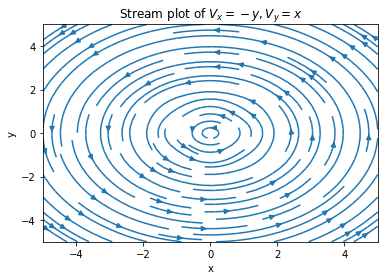

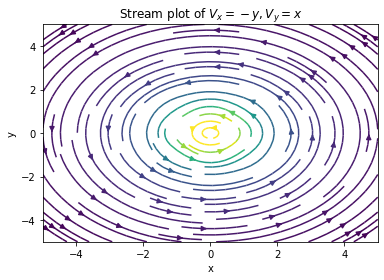

In [7]:
#make a streamplot
plt.figure()
plt.streamplot(X, Y, Vx, Vy)
plt.title("Stream plot of $V_x = -y, V_y = x$")
plt.xlabel("x")
plt.ylabel("y")

#make a streamplot with color
plt.figure()
plt.streamplot(X, Y, Vx, Vy, color=Vmag)
plt.title("Stream plot of $V_x = -y, V_y = x$")
plt.xlabel("x")
plt.ylabel("y")

# Task 1: Visualizing a magnetic dipole field.
Often in physics you will encounter formulas that someone else derived. Graphing those equations can be a good way to build intuition about how different solutions work. In this exercise we look at the equation for the magnetic field of a magnetic dipole.
$$\vec{B}_\textrm{dipole}(\vec{r}) = \frac{\mu_0}{4\pi}\left[\frac{3\vec{r} (\vec{m}\cdot \vec{r})}{r^5} - \frac{\vec{m}}{r^3}  \right]$$

for your plot, the magnetic moment constant for the dipole is located at the origin and pointing at 45 degrees between x and y. $\vec{m}$ is expressed in units of $\textrm{Am}^2$ as 
$$\vec{m} = \frac{1}{\sqrt{2} }\hat{i} +\frac{1}{\sqrt{2} }\hat{j}$$

1. Before you start coding in Python, rewrite the equation for $\vec{B}_\textrm{dipole}(\vec{r})$ in terms of components $(B_x, B_y, m_x, m_y, x, y)$
1. Create a vector plot of the magnetic field
1. Create a stream plot of the magnetic field
1. Add a color to color the arrows or streams based on the magnitude of the magnitude of B.
1. Show (yourself) that changing the orientation of the magnetic moment $\vec{m}$ changes the orientation of the dipole pattern.

![Magnetic dipole field](Magnetic_dipole.png)
Hint: To get a better quiver plot you prefer to scaling the magnitude of the $\vec{B}$ field to be be 1. In other words, make all the B-fields into unit vectors. 

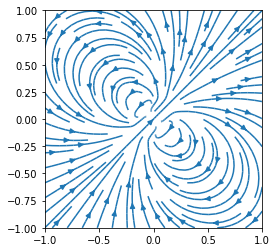

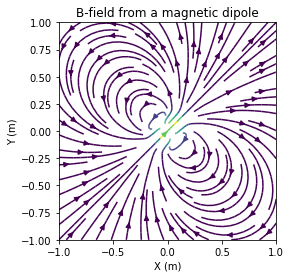

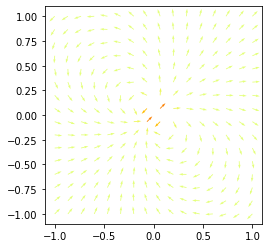

In [12]:
""" 
Solution for plotting vector field of a magnetic dipole in the xy plane. 
Treat this as a 2D problem. You can ignore the z-component.
"""
# import the magnetic permeability from scipy.constants

mx = (1/2)**(0.5)
my = (1/2)**(0.5)

# Calculate the meshgrids

# Calculate the magnetic fields over the meshgrid

# create the plots

### BEGIN SOLUTION
from scipy.constants import mu_0

xrange = np.linspace(-1,1,16)
yrange = np.linspace(-1,1,16)
X, Y = np.meshgrid(xrange, yrange)

r = (X**2 + Y**2)**0.5
const = mu_0/(4*np.pi)
BX = const * ( 3*X * (mx*X + my*Y)/r**5 - mx/r**3 )
BY = const * ( 3*Y * (mx*X + my*Y)/r**5 - my/r**3 )

fig = plt.figure()  # creates a new figure
ax = plt.gca()      # gca() gets the current "axes object" which has lots of plot settings
ax.set_aspect('equal')
plt.streamplot(X,Y,BX, BY)


# Add color based on the magnitude of B
Bmag = (BX**2 + BY**2)**0.5
fig = plt.figure()  # creates a new figure
ax = plt.gca()      # gca() gets the current "axes object" which has lots of plot settings
ax.set_aspect('equal')
plt.streamplot(X,Y,BX, BY, color=Bmag)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("B-field from a magnetic dipole")
#plt.colorbar()
#plt.savefig("Magnetic_dipole.png")



fig = plt.figure()  # creates a new figure
ax = plt.gca()      # gca() gets the current "axes object" which has lots of plot settings
ax.set_aspect('equal')
plt.quiver(X,Y,BX/Bmag, BY/Bmag, Bmag,cmap="Wistia")

### END SOLUTION

In [11]:
""" Test case for making a plot of the magnetic dipole. 
If you don't match the kind of pattern shown above, you will lose points. """

assert True

# Task 2 : Create a quiver plot and streamplot of a function of your choice.
Your requirements:
1. Pick an interesting function 
2. Thoughtfully choose the x and y limits to reveal some interesting behavior.
1. Create a quiver plot and streamplot
3. Label the axes

Text(0, 0.5, 'y')

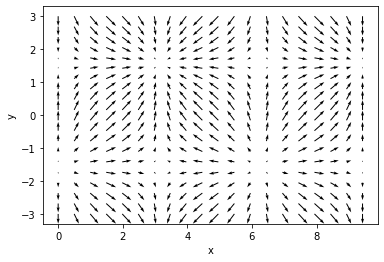

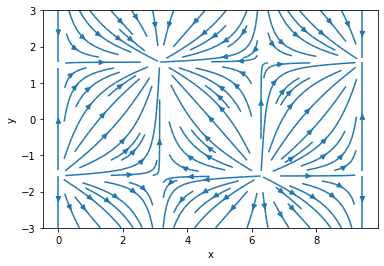

In [13]:
""" Create a contour plot for a function of your choice """

### BEGIN SOLUTION
xrange = np.linspace(0,3*np.pi,20)  # 1D array of x values
yrange = np.linspace(-3,3,20)  # 1D array of y values
X, Y = np.meshgrid(xrange, yrange)  # create 2D arrays of X and Y values
Vx = np.sin(X) # compute x-component of vector field (2D array of values)
Vy = np.cos(Y) # compute x-component of vector field (2D array of values)

plt.quiver(X, Y, Vx, Vy)
plt.xlabel("x")
plt.ylabel("y")


plt.figure()
plt.streamplot(X,Y,Vx,Vy)
plt.xlabel("x")
plt.ylabel("y")

### END SOLUTION

In [14]:
""" Test case for making a quiver plot of a function of your own choosing.
Add a title to explain your field. Also add axes labels."""
assert True

# CAUTION about using meshgrid 
This caution is duplicated from PS6B, since the same issue arises for both.

Consider these two ways (shown in cell below) to define a function that represents the paraboloid $z = x^2 + y^2$.

In [15]:
# The "GOOD" definition for applying meshgrids
# DOES NOT RESHAPE the variables x and y into some other numpy array.
def f1(x,y) :
    z = x**2 + y**2
    return z

# the "BAD" definition for applying meshgrids
# converts x and y into a single numpy array. 
# This will cause problems when evaluating f2(X,Y) over a meshgrid of points
def f2(x,y) :
    rvec = np.array([x,y])
    r = np.linalg.norm(rvec)
    z = r**2
    return z

# Task 3: Define a function for the electric field

$$\vec{E} = \frac{1}{4\pi\epsilon_0}\frac{q}{r^2}\hat{r}$$

**Function name:** `point_charge_field`

**Inputs:** 
* `x` x-coordinate to evaluate potential at (in meters)
* `y` y-coordinate to evaluate potential at (in meters)
* `z` z-coordinate to evaluate potential at (in meters)
* `xq` x-coordinate of the point charge (in meters)
* `yq` y-coordinate of the point charge (in meters)
* `zq` z-coordinate of the point charge (in meters)
* `q` value of the charge (in Coulombs)

**Outputs:**
* A list of the three field components `[Ex,Ey,Ez]` the electric potential (in J/m or N/C)

**Note** this task is very similar to Task 5 in PS3B, which defined the `F_grav_comp()` function.

In [33]:
""" Define a function for the electric field """

from scipy.constants import epsilon_0

### BEGIN SOLUTION

from scipy.constants import e

def point_charge_field(x,y,z,xq,yq,zq,q) :
    
    r = ( (x-xq)**2 + (y-yq)**2 + (z-zq)**2 )**0.5
    Emag = 1/(4*np.pi*epsilon_0) * q * 1/r**2
    Ex =  Emag * (x-xq)/r
    Ey =  Emag * (y-yq)/r
    Ez =  Emag * (z-zq)/r
    
    return [Ex,Ey,Ez]

print( e )
print( point_charge_field(0,0,1,0,0,0, e) )
print( point_charge_field(1,2,3,10,-3,6, e) )
print( point_charge_field(-3,-3,-3,-2,-3,-3, e) )
print( point_charge_field(-3,-3,-3,-2,-3,-3, 4*e) )


print(type(point_charge_field(-1,3,6,-1,3,5, e)))
#print( point_charge_field(0,0,0,0,0,0,1))
### END SOLUTION

1.602176634e-19
[0.0, 0.0, 1.439964547842567e-09]
[-1.0508665026981781e-11, 5.838147237212101e-12, -3.5028883423272605e-12]
[-1.439964547842567e-09, 0.0, 0.0]
[-5.759858191370268e-09, 0.0, 0.0]
<class 'list'>


In [34]:
""" Check the point_charge_potential() function"""
from scipy.constants import e  # electron charge  magnitude

def vector_error(studentresult, instructorresult) :
    studentvec = np.array(studentresult)
    instructorvec = np.array(instructorresult)
    error = np.linalg.norm(studentvec - instructorvec)/np.linalg.norm(instructorvec)
    return error
    

# force between two people shoudl be less than a micronewton.
studentresult = point_charge_field(0,0,1,0,0,0, e)
#print(result)

assert type(studentresult) == list  # check the type of the returned result is as-specified
assert len(studentresult) == 3  # check the length of the list output

# check if the force vector is very close to the test case calculation
instructorresult = [0.0, 0.0, 1.4399645351950547e-09]
assert vector_error(studentresult, instructorresult ) < 1e-5

# revese m1 and m2 values
studentresult = point_charge_field(1,2,3,10,-3,6, e)
instructorresult = [-1.050866493468196e-11, 5.838147185934422e-12, -3.5028883115606537e-12]
assert vector_error(studentresult, instructorresult ) < 1e-5


# shift positions of both masses by equal amounts
studentresult = point_charge_field(-3,-3,-3,-2,-3,-3, e)
instructorresult = [-1.4399645351950547e-09, 0.0, 0.0]
assert vector_error(studentresult, instructorresult ) < 1e-5

# change charge by 4x
studentresult = point_charge_field(-3,-3,-3,-2,-3,-3, 4*e)
instructorresult = [-5.759858140780219e-9, 0.0, 0.0]
assert vector_error(studentresult, instructorresult ) < 1e-5

del studentresult, instructorresult, vector_error


# Task 4: Create a quiver and stream plot of the electric field of a single electron

* Use your `point_charge_field` with meshgrids to calculate arrays of values for Ex, Ey, and Ez. 
* You will need to "unpack" the output from the `point_charge_field` function
* Make sure to pick the x and y limits in a reasonable way. Which plane will you visualize the field in? 
* add x and y labels to the plot

(-3.0000000000000004e-09, 3.0000000000000004e-09)

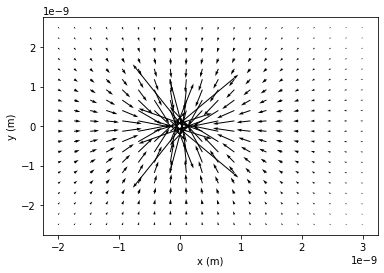

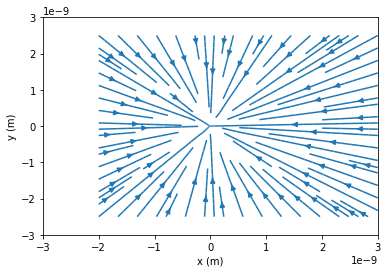

In [35]:
""" Create a plot of the electric field from a single point charge """

%matplotlib inline

### BEGIN SOLUTION
from scipy.constants import e

d = 1e-9
xe = 0; ye = 0; ze = 0
xp = d; yp = 0; zp = 0

z_offset = 0.3*d

xrange = np.linspace(-2*d,3*d,20)
yrange = np.linspace(-2.5*d,2.5*d,20)
X, Y = np.meshgrid(xrange, yrange)
EX, EY, EZ = point_charge_field(X,Y,z_offset,xe, ye, ze, -e) # + point_charge_potential(X,Y,z_offset,xp, yp, zp, e)

plt.quiver(X,Y,EX, EY)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.figure()
plt.streamplot(X,Y,EX, EY)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.xlim(-3*d, 3*d)
plt.ylim(-3*d, 3*d)
### END SOLUTION

In [36]:
"""Make sure your plot makes sense and has axes labels and a title 
where the function is shown. If the plot is missing these details, you may lose points."""

assert True

# Task 5: Create a plot of the electric field from a dipole
The goal of this task is to visualize the electric from an electric dipole composed of a proton and an electron that are separated by $d =$ 1 nm.
You must
1. Use your `point_charge_field()` function as part of your solution
1. Select coordinates for the proton and electron
1. Decide which plane you want to visualize the electric field in
1. Select a  range for the meshgrid that allows you to visualize the potential surrounding and between both charges.
1. Add a colorbar to the plot

**HINT:** Sometimes `plt.streamplot` will pick wierd limits for `xlim` and `ylim` that don't match the graph very well. You may need to manually adjust `plt.xlim()` and `plt.ylim()` if this happens.


(-2.5e-09, 2.5e-09)

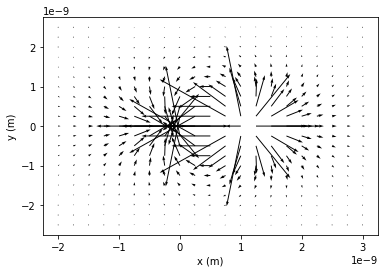

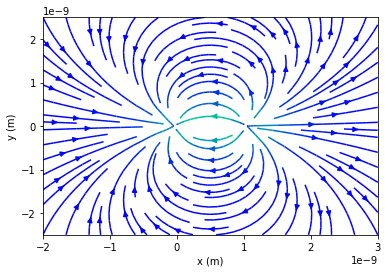

In [49]:
""" Create a plot of the electric field from an electric dipole of a proton and electron """

%matplotlib inline

### BEGIN SOLUTION
from scipy.constants import e

d = 1e-9
xe = 0; ye = 0; ze = 0
xp = d; yp = 0; zp = 0

z_offset = 0.3*d

xrange = np.linspace(-2*d,3*d,21)
yrange = np.linspace(-2.5*d,2.5*d,21)
X, Y = np.meshgrid(xrange, yrange)
EeX, EeY, EeZ = point_charge_field(X,Y,z_offset,xe, ye, ze, -e)  
EpX, EpY, EpZ = point_charge_field(X,Y,z_offset,xp, yp, zp, e)
EX = EeX + EpX
EY = EeY + EpY
C = ( EX**2 + EY**2 )**0.5
plt.figure()
plt.quiver(X,Y,EX, EY)
#plt.quiver(X,Y,EX, EY, color=C)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.figure()
plt.streamplot(X,Y,EX, EY, color=C, cmap="winter", density=1)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.xlim(xrange[0],xrange[-1])
plt.ylim(yrange[0],yrange[-1])

### END SOLUTION

In [ ]:
""" Task 5: Test case for making a quiver plot of a function of your own choosing.
Add a title to explain your field. Also add axes labels. """
assert True

# YOU ARE NOT FINISHED YET!
## There is a second notebook in this assignment where you do 3D interactive plots. Go on to the second notebook.